In [48]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def dot(x,y):
    ((a, b), (c, d)) = (x, y)
    return a * c + b * d

def plus(x, y):
    ((a, b), (c, d)) = (x, y)
    return (a + c, b + d)

def perceptron(init, data):
    yield init
    w = init
    err = True
    while err:
        err = False
        for p in data:
            if dot(p,w) < 0:
                err = True
                w = plus(w, p)
                yield w

In [41]:
def gen_cluster(x, y, r, s=100):
    xs = r * np.random.randn(s) + x
    ys = r * np.random.randn(s) + y
    return np.column_stack((xs, ys))

def plot_cluster(cl, c):
    plt.scatter(cl[:,0], cl[:,1], color=c)
    return cl

c1 = gen_cluster(0, 2.5, 1, 50)
c2 = gen_cluster(0, -2.5, 1, 50)

In [47]:
def plot_line(a,b):
    xs = [b, -b]
    ys = [-a, a]
    plt.plot(xs, ys)

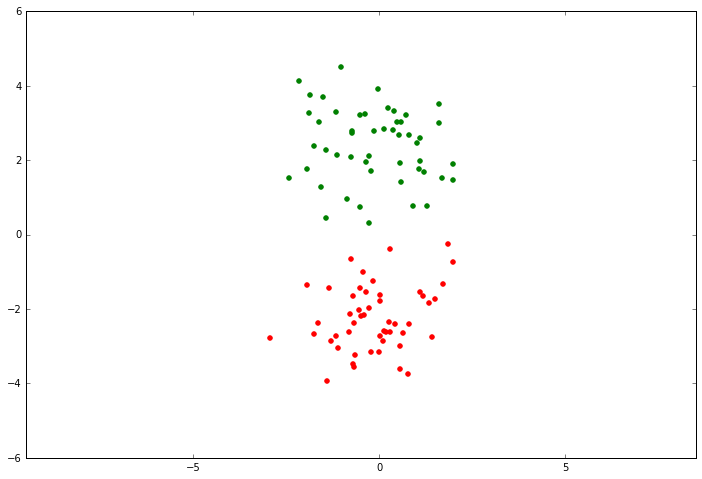

In [49]:
plt.figure(figsize=(12, 8))
plt.axis('equal')

plot_cluster(c1, 'g')
plot_cluster(c2, 'r')
data = np.concatenate([c1, np.vectorize(lambda x: -x)(c2)])
p = np.array(list(perceptron((10, 0), data)))
plt.show()

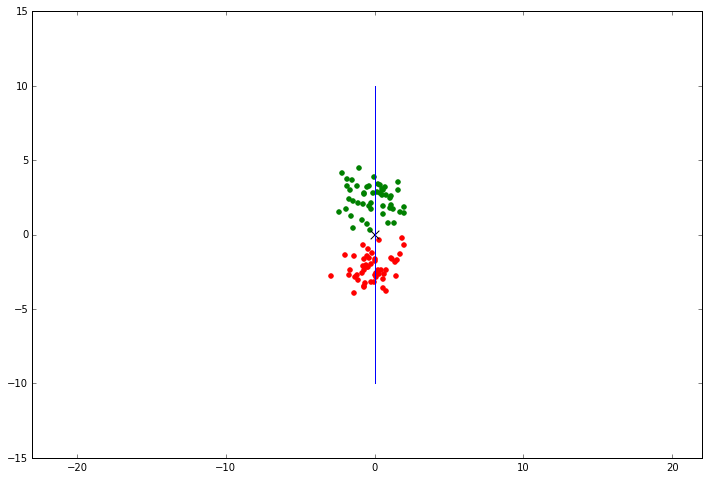

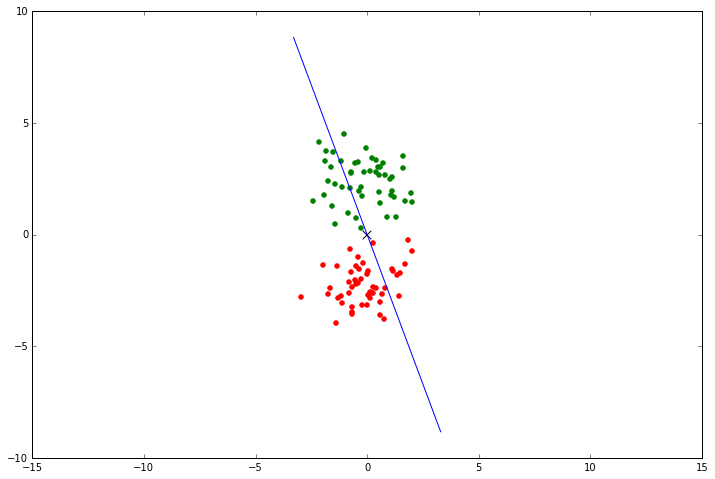

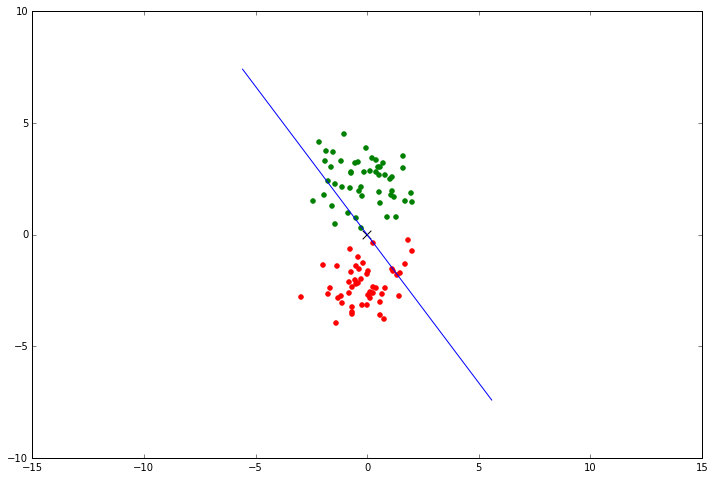

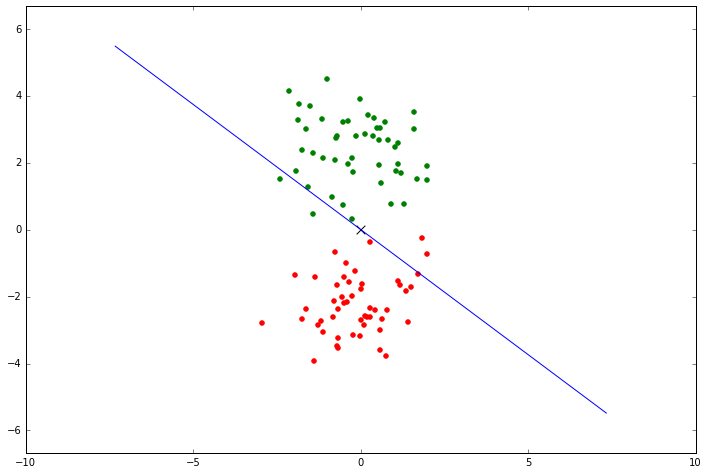

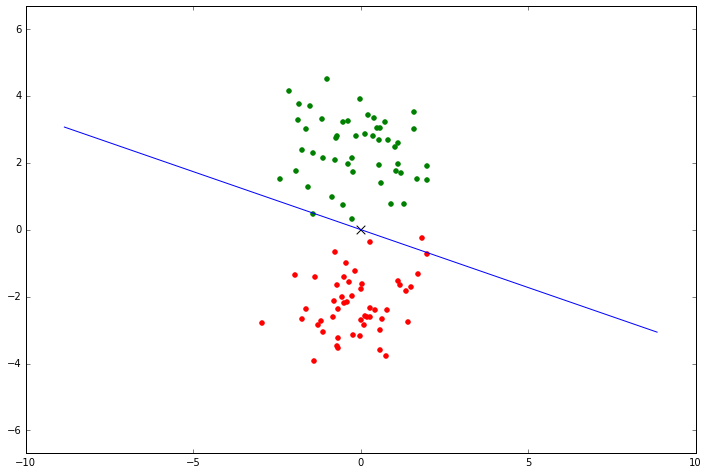

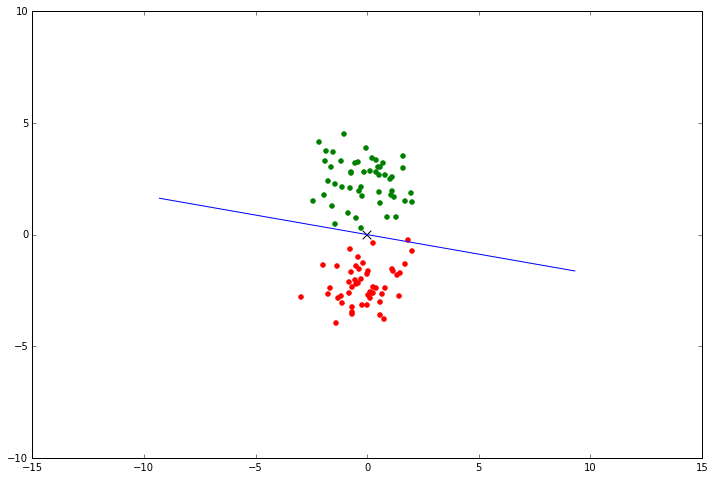

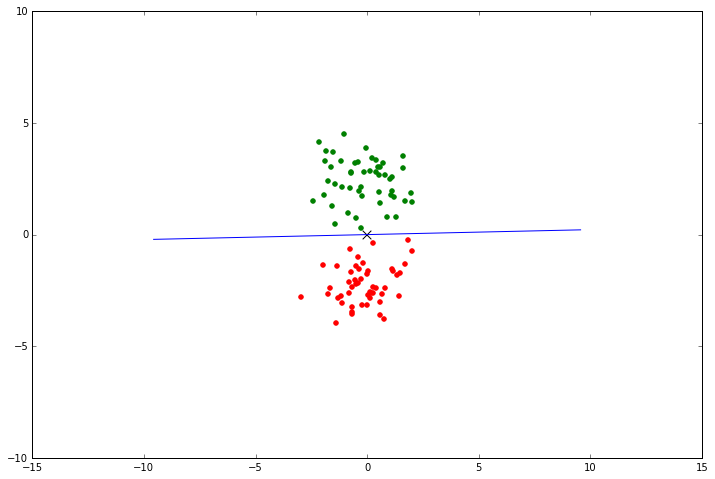

In [55]:
for line in p:
    plt.figure(figsize=(12, 8))
    plt.axis('equal')
    plot_cluster(c1, 'g')
    plot_cluster(c2, 'r')
    plot_line(*line)
    plt.scatter([0],[0],marker='x', s=75, c='black')
    plt.show()

## Špatně podmíněná data

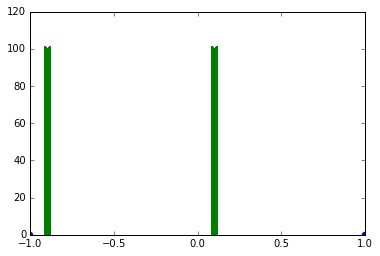

In [2]:
data = [(-1, 0.001), (1, 0.001)]

x, y = list(zip(*data))
plt.plot(x, y, 'o')
x, y = list(zip(*list(perceptron((0.1,1), data))))
plt.plot(x, y, 'x')

plt.show()